 # FAKE NEWS DETECTION PROJECT

## Step 1: Problem Statement and Business Case

### i. Right now, we live in a world of misinformation and fake news. The goal of this project is to detect fake news based on Neural Networks and NLP.
### ii. NLP works by converting words(text) into numbers.
### iii. These numbers are then used to train an AI/ML models to make predictions.
### iv. AI/ML based fake news detector is crucial for companies and media to automatically predict whether            circulating news is fake or not.
### v. In this project, we will analyze thousands of news text to detect if it is fake or not.

## Step 2: Import Libraries and Datasets

In [1]:
import nltk
nltk.download('punkt')

import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
import nltk
import re
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize

import gensim               ## It is an open-source library for unsupervised topic modelling and natural language processing

from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS

from tensorflow.keras.preprocessing.text import one_hot, Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Embedding, Input, LSTM, Conv1D, MaxPool1D, Bidirectional, SimpleRNN
from tensorflow.keras.models import Model
from jupyterthemes import jtplot
jtplot.style(theme = 'monokai', context = 'notebook', ticks = True, grid = False)

## setting the style of notebook to be monokai theme
## this line of code is important to ensure that we are able to see x and y axis clearly
## if we don't run this code line, we'll notice that xlabel and ylabel on any plot is black and it'll be hard to see them.

[nltk_data] Downloading package punkt to C:\Users\ACER-
[nltk_data]     PC\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
## Load the Data

df_true = pd.read_csv('True.csv')
df_fake = pd.read_csv('Fake.csv')

In [3]:
## Firt five rows of True.csv data

df_true.head()

title  \
0  As U.S. budget fight looms, Republicans flip t...   
1  U.S. military to accept transgender recruits o...   
2  Senior U.S. Republican senator: 'Let Mr. Muell...   
3  FBI Russia probe helped by Australian diplomat...   
4  Trump wants Postal Service to charge 'much mor...   

                                                text       subject  \
0  WASHINGTON (Reuters) - The head of a conservat...  politicsNews   
1  WASHINGTON (Reuters) - Transgender people will...  politicsNews   
2  WASHINGTON (Reuters) - The special counsel inv...  politicsNews   
3  WASHINGTON (Reuters) - Trump campaign adviser ...  politicsNews   
4  SEATTLE/WASHINGTON (Reuters) - President Donal...  politicsNews   

                 date  
0  December 31, 2017   
1  December 29, 2017   
2  December 31, 2017   
3  December 30, 2017   
4  December 29, 2017

In [4]:
## First five rows of Fake.csv data

df_fake.head()

title  \
0   Donald Trump Sends Out Embarrassing New Year’...   
1   Drunk Bragging Trump Staffer Started Russian ...   
2   Sheriff David Clarke Becomes An Internet Joke...   
3   Trump Is So Obsessed He Even Has Obama’s Name...   
4   Pope Francis Just Called Out Donald Trump Dur...   

                                                text subject  \
0  Donald Trump just couldn t wish all Americans ...    News   
1  House Intelligence Committee Chairman Devin Nu...    News   
2  On Friday, it was revealed that former Milwauk...    News   
3  On Christmas day, Donald Trump announced that ...    News   
4  Pope Francis used his annual Christmas Day mes...    News   

                date  
0  December 31, 2017  
1  December 31, 2017  
2  December 30, 2017  
3  December 29, 2017  
4  December 25, 2017

In [5]:
## Shape of df_true and df_fake

print(df_true.shape)
print(df_fake.shape)

(21417, 4)
(23481, 4)


In [6]:
## we'll look for null values in both the data

print(df_true.isnull().sum())
print(df_fake.isnull().sum())

title      0
text       0
subject    0
date       0
dtype: int64
title      0
text       0
subject    0
date       0
dtype: int64


In [1]:
## Both our data does not contain any null values, therefore, we'll move to step 3 i.e., Exploratory Data Analysis

## Step 3: Performing Exploratory Data Analysis

In [7]:
## In this, firstly we'll add a target class column to indicate whether the news is real or fake

df_true['isfake'] = 1
df_true.head()

title  \
0  As U.S. budget fight looms, Republicans flip t...   
1  U.S. military to accept transgender recruits o...   
2  Senior U.S. Republican senator: 'Let Mr. Muell...   
3  FBI Russia probe helped by Australian diplomat...   
4  Trump wants Postal Service to charge 'much mor...   

                                                text       subject  \
0  WASHINGTON (Reuters) - The head of a conservat...  politicsNews   
1  WASHINGTON (Reuters) - Transgender people will...  politicsNews   
2  WASHINGTON (Reuters) - The special counsel inv...  politicsNews   
3  WASHINGTON (Reuters) - Trump campaign adviser ...  politicsNews   
4  SEATTLE/WASHINGTON (Reuters) - President Donal...  politicsNews   

                 date  isfake  
0  December 31, 2017        1  
1  December 29, 2017        1  
2  December 31, 2017        1  
3  December 30, 2017        1  
4  December 29, 2017        1

In [8]:
df_fake['isfake'] = 0
df_fake.head()

title  \
0   Donald Trump Sends Out Embarrassing New Year’...   
1   Drunk Bragging Trump Staffer Started Russian ...   
2   Sheriff David Clarke Becomes An Internet Joke...   
3   Trump Is So Obsessed He Even Has Obama’s Name...   
4   Pope Francis Just Called Out Donald Trump Dur...   

                                                text subject  \
0  Donald Trump just couldn t wish all Americans ...    News   
1  House Intelligence Committee Chairman Devin Nu...    News   
2  On Friday, it was revealed that former Milwauk...    News   
3  On Christmas day, Donald Trump announced that ...    News   
4  Pope Francis used his annual Christmas Day mes...    News   

                date  isfake  
0  December 31, 2017       0  
1  December 31, 2017       0  
2  December 30, 2017       0  
3  December 29, 2017       0  
4  December 25, 2017       0

In [9]:
## Now, we'll concatenate real and fake news

df = pd.concat([df_true, df_fake]).reset_index(drop = True)
df

title  \
0      As U.S. budget fight looms, Republicans flip t...   
1      U.S. military to accept transgender recruits o...   
2      Senior U.S. Republican senator: 'Let Mr. Muell...   
3      FBI Russia probe helped by Australian diplomat...   
4      Trump wants Postal Service to charge 'much mor...   
...                                                  ...   
44893  McPain: John McCain Furious That Iran Treated ...   
44894  JUSTICE? Yahoo Settles E-mail Privacy Class-ac...   
44895  Sunnistan: US and Allied ‘Safe Zone’ Plan to T...   
44896  How to Blow $700 Million: Al Jazeera America F...   
44897  10 U.S. Navy Sailors Held by Iranian Military ...   

                                                    text       subject  \
0      WASHINGTON (Reuters) - The head of a conservat...  politicsNews   
1      WASHINGTON (Reuters) - Transgender people will...  politicsNews   
2      WASHINGTON (Reuters) - The special counsel inv...  politicsNews   
3      WASHINGTON (Reuters) - Trump campaign adviser ...  politicsNews   
4      SEATTLE/WASHINGTON (Reuters) - President Donal...  politicsNews   
...                                                  ...           ...   
44893  21st Century Wire says As 21WIRE reported earl...   Middle-east   
44894  21st Century Wire says It s a familiar theme. ...   Middle-east   
44895  Patrick Henningsen  21st Century WireRemember ...   Middle-east   
44896  21st Century Wire says Al Jazeera America will...   Middle-east   
44897  21st Century Wire says As 21WIRE predicted in ...   Middle-east   

                     date  isfake  
0      December 31, 2017        1  
1      December 29, 2017        1  
2      December 31, 2017        1  
3      December 30, 2017        1  
4      December 29, 2017        1  
...                   ...     ...  
44893    January 16, 2016       0  
44894    January 16, 2016       0  
44895    January 15, 2016       0  
44896    January 14, 2016       0  
44897    January 12, 2016       0  

[44898 rows x 5 columns]

In [10]:
## Now, we'll drop the date column as it is not relevant in our prediction

df.drop(columns = ['date'], inplace = True)

In [11]:
df.head()

title  \
0  As U.S. budget fight looms, Republicans flip t...   
1  U.S. military to accept transgender recruits o...   
2  Senior U.S. Republican senator: 'Let Mr. Muell...   
3  FBI Russia probe helped by Australian diplomat...   
4  Trump wants Postal Service to charge 'much mor...   

                                                text       subject  isfake  
0  WASHINGTON (Reuters) - The head of a conservat...  politicsNews       1  
1  WASHINGTON (Reuters) - Transgender people will...  politicsNews       1  
2  WASHINGTON (Reuters) - The special counsel inv...  politicsNews       1  
3  WASHINGTON (Reuters) - Trump campaign adviser ...  politicsNews       1  
4  SEATTLE/WASHINGTON (Reuters) - President Donal...  politicsNews       1

In [12]:
## Now we'll combine both the text and title together in a new column entitles 'original'

df['original'] = df['title'] + ' ' + df['text']
df.head()

title  \
0  As U.S. budget fight looms, Republicans flip t...   
1  U.S. military to accept transgender recruits o...   
2  Senior U.S. Republican senator: 'Let Mr. Muell...   
3  FBI Russia probe helped by Australian diplomat...   
4  Trump wants Postal Service to charge 'much mor...   

                                                text       subject  isfake  \
0  WASHINGTON (Reuters) - The head of a conservat...  politicsNews       1   
1  WASHINGTON (Reuters) - Transgender people will...  politicsNews       1   
2  WASHINGTON (Reuters) - The special counsel inv...  politicsNews       1   
3  WASHINGTON (Reuters) - Trump campaign adviser ...  politicsNews       1   
4  SEATTLE/WASHINGTON (Reuters) - President Donal...  politicsNews       1   

                                            original  
0  As U.S. budget fight looms, Republicans flip t...  
1  U.S. military to accept transgender recruits o...  
2  Senior U.S. Republican senator: 'Let Mr. Muell...  
3  FBI Russia probe helped by Australian diplomat...  
4  Trump wants Postal Service to charge 'much mor...

In [13]:
## Explore a sample news

df['original'][0]

'As U.S. budget fight looms, Republicans flip their fiscal script WASHINGTON (Reuters) - The head of a conservative Republican faction in the U.S. Congress, who voted this month for a huge expansion of the national debt to pay for tax cuts, called himself a “fiscal conservative” on Sunday and urged budget restraint in 2018. In keeping with a sharp pivot under way among Republicans, U.S. Representative Mark Meadows, speaking on CBS’ “Face the Nation,” drew a hard line on federal spending, which lawmakers are bracing to do battle over in January. When they return from the holidays on Wednesday, lawmakers will begin trying to pass a federal budget in a fight likely to be linked to other issues, such as immigration policy, even as the November congressional election campaigns approach in which Republicans will seek to keep control of Congress. President Donald Trump and his Republicans want a big budget increase in military spending, while Democrats also want proportional increases for non

## Step 4: Performing Data Cleaning

In [14]:
## download stopwords

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\ACER-
[nltk_data]     PC\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [15]:
## Obtain additional stopwords from nltk

from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])

In [16]:
## Now, we'll remove stopwords and also the words with 2 or less characters

def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3 and token not in stop_words:
            result.append(token)
            
    return result

In [17]:
## Now, we'll apply the function to the dataframe

df['combined'] = df['original'].apply(preprocess)

In [18]:
print(df['combined'][0])

['budget', 'fight', 'looms', 'republicans', 'flip', 'fiscal', 'script', 'washington', 'reuters', 'head', 'conservative', 'republican', 'faction', 'congress', 'voted', 'month', 'huge', 'expansion', 'national', 'debt', 'cuts', 'called', 'fiscal', 'conservative', 'sunday', 'urged', 'budget', 'restraint', 'keeping', 'sharp', 'pivot', 'republicans', 'representative', 'mark', 'meadows', 'speaking', 'face', 'nation', 'drew', 'hard', 'line', 'federal', 'spending', 'lawmakers', 'bracing', 'battle', 'january', 'return', 'holidays', 'wednesday', 'lawmakers', 'begin', 'trying', 'pass', 'federal', 'budget', 'fight', 'likely', 'linked', 'issues', 'immigration', 'policy', 'november', 'congressional', 'election', 'campaigns', 'approach', 'republicans', 'seek', 'control', 'congress', 'president', 'donald', 'trump', 'republicans', 'want', 'budget', 'increase', 'military', 'spending', 'democrats', 'want', 'proportional', 'increases', 'defense', 'discretionary', 'spending', 'programs', 'support', 'educati

In [19]:
df

title  \
0      As U.S. budget fight looms, Republicans flip t...   
1      U.S. military to accept transgender recruits o...   
2      Senior U.S. Republican senator: 'Let Mr. Muell...   
3      FBI Russia probe helped by Australian diplomat...   
4      Trump wants Postal Service to charge 'much mor...   
...                                                  ...   
44893  McPain: John McCain Furious That Iran Treated ...   
44894  JUSTICE? Yahoo Settles E-mail Privacy Class-ac...   
44895  Sunnistan: US and Allied ‘Safe Zone’ Plan to T...   
44896  How to Blow $700 Million: Al Jazeera America F...   
44897  10 U.S. Navy Sailors Held by Iranian Military ...   

                                                    text       subject  \
0      WASHINGTON (Reuters) - The head of a conservat...  politicsNews   
1      WASHINGTON (Reuters) - Transgender people will...  politicsNews   
2      WASHINGTON (Reuters) - The special counsel inv...  politicsNews   
3      WASHINGTON (Reuters) - Trump campaign adviser ...  politicsNews   
4      SEATTLE/WASHINGTON (Reuters) - President Donal...  politicsNews   
...                                                  ...           ...   
44893  21st Century Wire says As 21WIRE reported earl...   Middle-east   
44894  21st Century Wire says It s a familiar theme. ...   Middle-east   
44895  Patrick Henningsen  21st Century WireRemember ...   Middle-east   
44896  21st Century Wire says Al Jazeera America will...   Middle-east   
44897  21st Century Wire says As 21WIRE predicted in ...   Middle-east   

       isfake                                           original  \
0           1  As U.S. budget fight looms, Republicans flip t...   
1           1  U.S. military to accept transgender recruits o...   
2           1  Senior U.S. Republican senator: 'Let Mr. Muell...   
3           1  FBI Russia probe helped by Australian diplomat...   
4           1  Trump wants Postal Service to charge 'much mor...   
...       ...                                                ...   
44893       0  McPain: John McCain Furious That Iran Treated ...   
44894       0  JUSTICE? Yahoo Settles E-mail Privacy Class-ac...   
44895       0  Sunnistan: US and Allied ‘Safe Zone’ Plan to T...   
44896       0  How to Blow $700 Million: Al Jazeera America F...   
44897       0  10 U.S. Navy Sailors Held by Iranian Military ...   

                                                combined  
0      [budget, fight, looms, republicans, flip, fisc...  
1      [military, accept, transgender, recruits, mond...  
2      [senior, republican, senator, mueller, washing...  
3      [russia, probe, helped, australian, diplomat, ...  
4      [trump, wants, postal, service, charge, amazon...  
...                                                  ...  
44893  [mcpain, john, mccain, furious, iran, treated,...  
44894  [justice, yahoo, settles, mail, privacy, class...  
44895  [sunnistan, allied, safe, zone, plan, territor...  
44896  [blow, million, jazeera, america, finally, cal...  
44897  [navy, sailors, held, iranian, military, signs...  

[44898 rows x 6 columns]

In [20]:
## Obtain the total words present in the dataset

list_of_words = []
for i in df.combined:
    for j in i:
        list_of_words.append(j)

In [21]:
## Now, we'll obtain the total number of unique words

total_words = len(list(set(list_of_words)))
total_words

108704

In [22]:
## Therefore, there are total 108704 words in our dataset

In [23]:
## Join the words into a string

df['combined'] = df['combined'].apply(lambda x: " ".join(x))

In [24]:
df['combined'][0]

'budget fight looms republicans flip fiscal script washington reuters head conservative republican faction congress voted month huge expansion national debt cuts called fiscal conservative sunday urged budget restraint keeping sharp pivot republicans representative mark meadows speaking face nation drew hard line federal spending lawmakers bracing battle january return holidays wednesday lawmakers begin trying pass federal budget fight likely linked issues immigration policy november congressional election campaigns approach republicans seek control congress president donald trump republicans want budget increase military spending democrats want proportional increases defense discretionary spending programs support education scientific research infrastructure public health environmental protection trump administration willing going increase defense discretionary spending percent meadows chairman small influential house freedom caucus said program democrats saying need government raise 

## Step 5: Visualize the cleaned up dataset 

In [25]:
df

title  \
0      As U.S. budget fight looms, Republicans flip t...   
1      U.S. military to accept transgender recruits o...   
2      Senior U.S. Republican senator: 'Let Mr. Muell...   
3      FBI Russia probe helped by Australian diplomat...   
4      Trump wants Postal Service to charge 'much mor...   
...                                                  ...   
44893  McPain: John McCain Furious That Iran Treated ...   
44894  JUSTICE? Yahoo Settles E-mail Privacy Class-ac...   
44895  Sunnistan: US and Allied ‘Safe Zone’ Plan to T...   
44896  How to Blow $700 Million: Al Jazeera America F...   
44897  10 U.S. Navy Sailors Held by Iranian Military ...   

                                                    text       subject  \
0      WASHINGTON (Reuters) - The head of a conservat...  politicsNews   
1      WASHINGTON (Reuters) - Transgender people will...  politicsNews   
2      WASHINGTON (Reuters) - The special counsel inv...  politicsNews   
3      WASHINGTON (Reuters) - Trump campaign adviser ...  politicsNews   
4      SEATTLE/WASHINGTON (Reuters) - President Donal...  politicsNews   
...                                                  ...           ...   
44893  21st Century Wire says As 21WIRE reported earl...   Middle-east   
44894  21st Century Wire says It s a familiar theme. ...   Middle-east   
44895  Patrick Henningsen  21st Century WireRemember ...   Middle-east   
44896  21st Century Wire says Al Jazeera America will...   Middle-east   
44897  21st Century Wire says As 21WIRE predicted in ...   Middle-east   

       isfake                                           original  \
0           1  As U.S. budget fight looms, Republicans flip t...   
1           1  U.S. military to accept transgender recruits o...   
2           1  Senior U.S. Republican senator: 'Let Mr. Muell...   
3           1  FBI Russia probe helped by Australian diplomat...   
4           1  Trump wants Postal Service to charge 'much mor...   
...       ...                                                ...   
44893       0  McPain: John McCain Furious That Iran Treated ...   
44894       0  JUSTICE? Yahoo Settles E-mail Privacy Class-ac...   
44895       0  Sunnistan: US and Allied ‘Safe Zone’ Plan to T...   
44896       0  How to Blow $700 Million: Al Jazeera America F...   
44897       0  10 U.S. Navy Sailors Held by Iranian Military ...   

                                                combined  
0      budget fight looms republicans flip fiscal scr...  
1      military accept transgender recruits monday pe...  
2      senior republican senator mueller washington r...  
3      russia probe helped australian diplomat washin...  
4      trump wants postal service charge amazon shipm...  
...                                                  ...  
44893  mcpain john mccain furious iran treated sailor...  
44894  justice yahoo settles mail privacy class actio...  
44895  sunnistan allied safe zone plan territorial bo...  
44896  blow million jazeera america finally calls qui...  
44897  navy sailors held iranian military signs neoco...  

[44898 rows x 6 columns]

In [26]:
## Text per subject

df_grouped = df[['isfake', 'subject', 'text']].groupby(['isfake', 'subject']).count()
df_grouped

text
isfake subject               
0      Government News   1570
       Middle-east        778
       News              9050
       US_News            783
       left-news         4459
       politics          6841
1      politicsNews     11272
       worldnews        10145

<AxesSubplot:xlabel='count', ylabel='subject'>

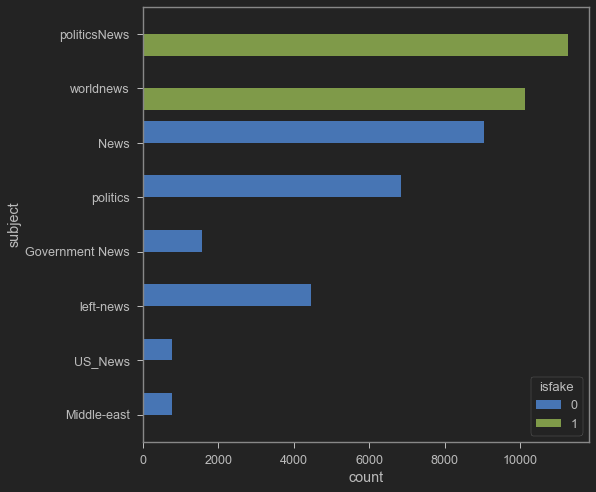

In [27]:
## plot the counts of words in subjects

plt.figure(figsize = (8,8))
sns.countplot(y = 'subject', hue = 'isfake', data = df)

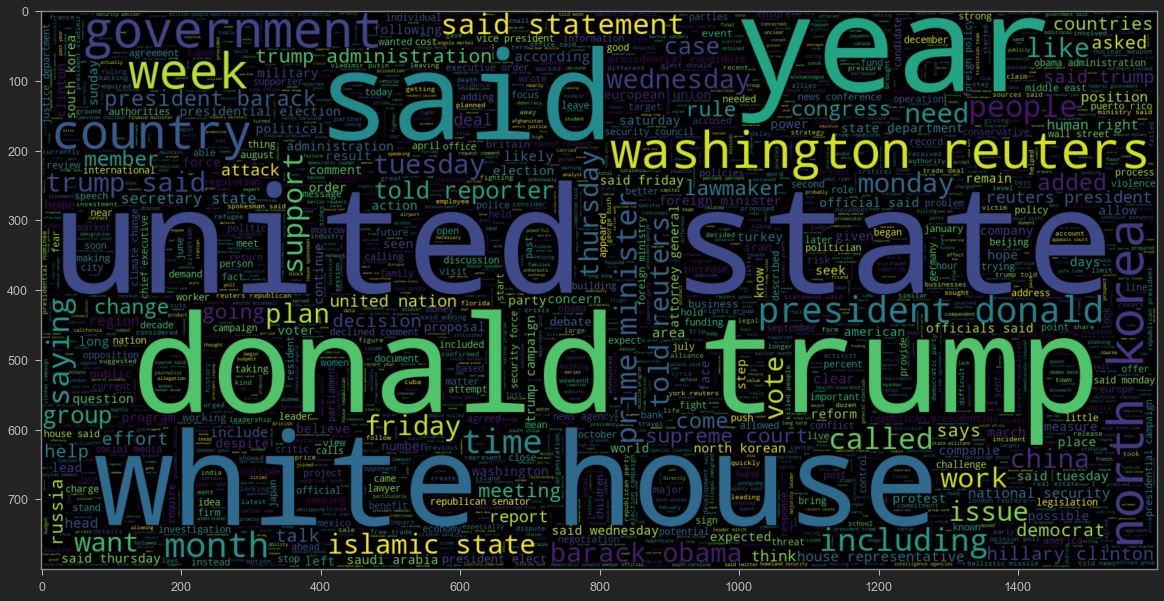

In [28]:
## Now we'll plot the word cloud for text that is real

plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 2000, width = 1600, height = 800, stopwords = stop_words).generate(" ".join(df[df.isfake == 1].combined))
plt.imshow(wc, interpolation = 'bilinear')

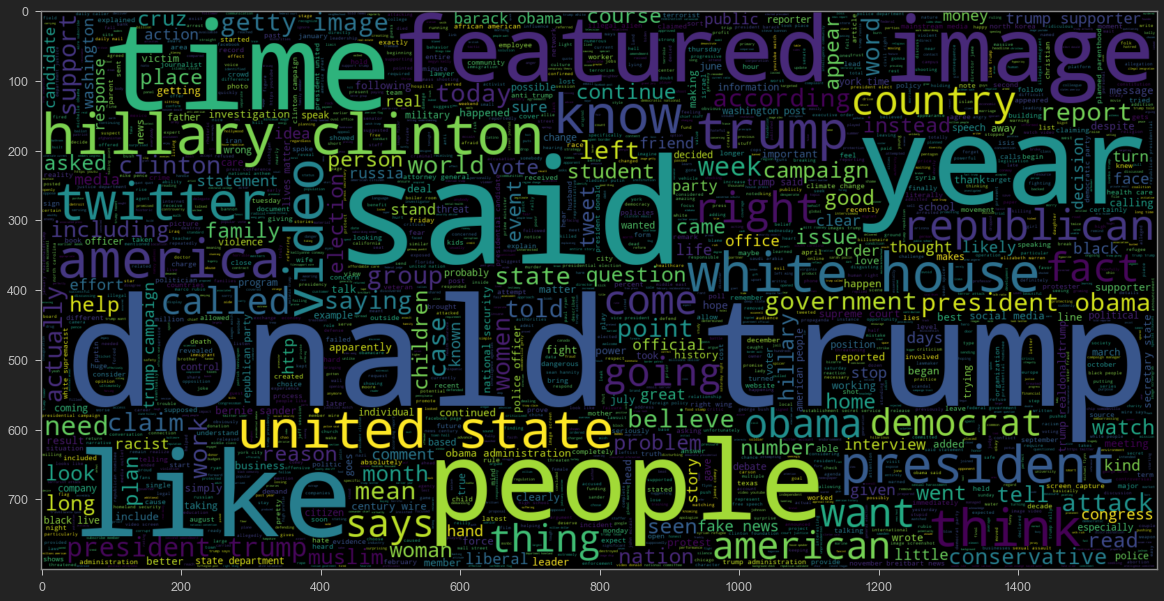

In [29]:
## Now we'll plot word cloud for text that is fake

plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 2000, width = 1600, height = 800, stopwords = stop_words).generate(" ".join(df[df.isfake == 0].combined))
plt.imshow(wc, interpolation = 'bilinear')

In [30]:
## Length of maximum document will be needed to create word embeddings

maxlen = -1
for doc in df.combined:
    tokens = nltk.word_tokenize(doc)
    if(maxlen<len(tokens)):
        maxlen = len(tokens)
print('The maximum number of words in any document is : ', maxlen)

The maximum number of words in any document is :  4405


In [31]:
## Now, we'll visualize the distribution of number of words in a text

import plotly.express as px
fig = px.histogram(x = [len(nltk.word_tokenize(x)) for x in df.combined], nbins = 100)
fig.show()

## Step 6: Preparing Data by performing Tokenization and padding

### Tokenizer allows us to vectorize text corpus by turning each text into a sequence of integers
### For e.g., suppose we have a sentence "budget fight looms republicans flip fiscal script Washington Reuters head conservative republican faction congress voted month...." and the tokens for this sentence will be "[3138, 3581, 2895, 27, 5354, 22457, 3505, 9, 3198, 35, .....]"

In [32]:
## Splitting data into train and test

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.combined, df.isfake, test_size = 0.2)

In [33]:
from nltk import word_tokenize

In [34]:
## Now, we'll create a tokenizer to tokenize the words and create sequences of tokenized words

tokenizer = Tokenizer(num_words = total_words)
tokenizer.fit_on_texts(X_train)
train_sequences = tokenizer.texts_to_sequences(X_train)
test_sequences = tokenizer.texts_to_sequences(X_test)

In [ ]:
train_sequences

In [36]:
len(train_sequences)

35918

In [ ]:
test_sequences

In [38]:
len(test_sequences)

8980

In [39]:
print('The encoding for document\n', df.combined[0], "\n is : ", train_sequences[0])

The encoding for document
 budget fight looms republicans flip fiscal script washington reuters head conservative republican faction congress voted month huge expansion national debt cuts called fiscal conservative sunday urged budget restraint keeping sharp pivot republicans representative mark meadows speaking face nation drew hard line federal spending lawmakers bracing battle january return holidays wednesday lawmakers begin trying pass federal budget fight likely linked issues immigration policy november congressional election campaigns approach republicans seek control congress president donald trump republicans want budget increase military spending democrats want proportional increases defense discretionary spending programs support education scientific research infrastructure public health environmental protection trump administration willing going increase defense discretionary spending percent meadows chairman small influential house freedom caucus said program democrats say

In [40]:
## Now add padding, maxlen = 4406 or smaller number maxlen = 40 seems to work well based on results

padded_train = pad_sequences(train_sequences, maxlen = 40, padding = 'post', truncating = 'post')
padded_test = pad_sequences(test_sequences, maxlen = 40, truncating = 'post')

In [41]:
for i, doc in enumerate(padded_train[:2]):
    print('The padded encoding for document', i+1, " is : ", doc)

The padded encoding for document 1  is :  [  231   284   776   990  3037  1685  2460   105    25     9     8   457
   762   284   275    82  1523   990  3037   454  2460  1377  2193  1685
   105  2194 65482    59 10639   278   446  4481   284   776    59  5911
  1127 10125  2460   382]
The padded encoding for document 2  is :  [ 696 1316  158    5  677 5539  283  254 1744    9  696 1316  158    5
  677 9513   49  713  397 3946   54 2366 4706  741  283  713   31   94
    2   72 2148   54 1941  713  212 1558  783   11  219 1969]


## Step 6: Build and Train the model

### Embedding Layer:
#### Embedding layers learn the low-dimensional continuous representation of input discrete variables. For example, suppose that we have 100,000 unique values in our data and we want to train the model with this data. Even though we can train the model to generate accurate results, it would require more resources to train. Alternatively, by introducing an embedding layer, we can specify the number of low-dimensional features that we would need to represent the input data, in this case let's take the value to be 200. Now, what happens is that the embedding layer learns the way to represent 100,000 variables with 200 variable only (think of it as PCA or Autoencoder). This in turn helps subsequent layers learn more effectively with less compute resources. 

In [50]:
## Sequential model

model = Sequential() 

## embedding layer 

model.add(Embedding(total_words, output_dim = 128))

model.add(SimpleRNN(128))

model.add(Dense(128, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['acc'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, None, 128)         13914112  
                                                                 
 simple_rnn_2 (SimpleRNN)    (None, 128)               32896     
                                                                 
 dense_4 (Dense)             (None, 128)               16512     
                                                                 
 dense_5 (Dense)             (None, 1)                 129       
                                                                 
Total params: 13,963,649
Trainable params: 13,963,649
Non-trainable params: 0
_________________________________________________________________


In [51]:
total_words

108704

In [52]:
y_train = np.asarray(y_train)

In [53]:
## Train the model

history = model.fit(padded_train, y_train, batch_size = 64, validation_split = 0.1, epochs = 4)

Epoch 1/4
506/506 [==============================] - 162s 316ms/step - loss: 0.0375 - acc: 0.9856 - val_loss: 0.0367 - val_acc: 0.9916
Epoch 2/4
506/506 [==============================] - 157s 310ms/step - loss: 0.2893 - acc: 0.8691 - val_loss: 0.0478 - val_acc: 0.9905
Epoch 3/4
506/506 [==============================] - 158s 312ms/step - loss: 0.1309 - acc: 0.9502 - val_loss: 0.0394 - val_acc: 0.9919
Epoch 4/4
506/506 [==============================] - 160s 317ms/step - loss: 0.1500 - acc: 0.9395 - val_loss: 0.4758 - val_acc: 0.7815
